In [ ]:
from itertools import combinations
from sage.graphs.independent_sets import IndependentSets
from sage.graphs.cliquer import max_clique
n=6

H = graphs.CompleteGraph(Integer(3))
M = [[None for j in range(i)] for i in range(2**(n*(n-1)//2))]

# List of all possible edges between 4 vertices
vertices = [i for i in range(n)]
edges = list(combinations(vertices, 2))

# Generate all subsets of edges (power set)
all_graphs = []
for i in range(2 ** (n * (n - 1) // 2)):
    edge_subset = [edges[j] for j in range(len(edges)) if (i & (1 << j))]
    G = Graph()
    G.add_vertices(vertices)
    G.add_edges(edge_subset)
    all_graphs.append(G)

In [ ]:
# Generate Cayley graph (works nicely if n<6, after that, you have around half a billion pairs to consider)
Compl = graphs.CompleteGraph(Integer(n))
Cayley = graphs.EmptyGraph()
for _ in range(2**(n*(n-1)//2)):
    Cayley.add_vertex()
memo = dict()
for idx, G1 in enumerate(all_graphs):
     for jdx, G2 in enumerate(all_graphs[:idx]):
         G_sym = graphs.EmptyGraph()
         for _ in range(n):
             G_sym.add_vertex()
         for edge in Compl.edges():
             if (G1.has_edge(edge) !=  G2.has_edge(edge)):
                 G_sym.add_edge(edge)
         if f"{G_sym.edges()}" in memo:
             if memo[f"{G_sym.edges()}"] == 1:
                 Cayley.add_edge(idx,jdx)
         else:
             x = 1 * H.is_subgraph(G_sym, induced = False, up_to_isomorphism = True)
             memo[f"{G_sym.edges()}"] = x
             if x == 1:
                 Cayley.add_edge(idx,jdx)

P = graphs.CycleGraph(2**(n*(n-1)//2)).layout()
P = Cayley.plot(pos = P)
P.show()
             

In [8]:
def eigenvalues_of_cayley_graph():
    # There is a character chi for the Cayley graph Cay(Gamma,S) of the group Gamma = {0,1}^d with bitwise xor addition 
    # (d = 2**(n(n-1)//2)) of the form: chi(x) = (-1)**(r_i*x_i) for any element r in {0,1}^d. S is the generating set.
    # Let x in ({-1,1})^({0,1}^d) be such that x_a = chi(a), then x is an eigenvector with eigenvalue 1/|S| sum_{s in S} chi(s)
    # In our case, S is the set of graphs containing a triangle
    S = list()
    for greph in all_graphs:
        if H.is_subgraph(greph, induced = False, up_to_isomorphism = True):
            S.append(greph)
    S_size = len(S)
    
    eigenvalues = list()
    for greph1 in all_graphs:
        dum_sum = 0
        for greph2 in S:
            common_edges = 0
            for edge in greph2.edges():
                if greph1.has_edge(edge):
                    common_edges += 1
            common_edges %= 2
            dum_sum += 1 - 2*common_edges
        eigenvalues.append(dum_sum)
    return eigenvalues, S_size

In [23]:
eigenvals, degree = eigenvalues_of_cayley_graph()
least = float( "inf")
zeroes = 0
negative = 0
positive = 0
for val in eigenvals:
    if val < least:
        least = val
    if val < 0:
        negative += 1
    elif val == 0:
        zeroes += 1
    else:
        positive += 1
Cvetkovic = zeroes + min(positive, negative)
Hofmann = 2**(n*(n-1)//2) * (-least/(degree - least))
print(f"n = {n}")
print(f"eigenvalues of Cayley graph = {eigenvals}, \nnumber of eigenvalues = {2**(n*(n-1)//2)}")
print(f"zeroes = {zeroes}, positive = {positive}, negative = {negative}")
print(f"smallest eigenvalue = {least}, degree of Cayley graph = {degree}")
print(f"Cvetkovic bound = {Cvetkovic}, Hofmann bound = {Hofmann}")
print(f"Lower bound of 2**(n**2//4) = {2**(n**2//4)}")

n = 4
eigenvalues of Cayley graph = [23, -9, -9, 3, -9, 3, 3, 3, -9, 3, 3, -5, -5, 3, 3, -1, -9, 3, -5, 3, 3, -5, 3, -1, 3, 3, 3, -1, 3, -1, -1, -1, -9, -5, 3, 3, 3, 3, -5, -1, 3, 3, 3, -1, 3, -1, -1, -1, 3, 3, 3, -1, 3, -1, -1, -1, -5, -1, -1, -1, -1, -1, -1, 3], 
number of eigenvalues = 64
zeroes = 0, positive = 30, negative = 34
smallest eigenvalue = -9, degree of Cayley graph = 23
Cvetkovic bound = 30, Hofmann bound = 18
Lower bound of 2**(n**2//4) = 16


In [5]:
def bin_edge_repr(G) -> str:
    stringy = str()
    for i in range(n):
        for j in range(i + 1, n):
            if G.has_edge(i,j):
                stringy += '1'
            else:
                stringy += '0'
    return stringy

In [7]:
"Plotting helper"
G1 = graphs.CycleGraph(4)
fixed_pos_4 = G1.layout()

In [25]:
"For n=4, the following indices were chosen in the independent set problem"
if n==4:
    indices_chosen = [16, 17, 20, 21, 24, 25, 28, 29, 48, 49, 52, 53, 56, 57, 60, 61]
    for index in indices_chosen:
        # P = all_graphs[index].plot(pos=fixed_pos_4)
        # P.show()
        1

Solution 1


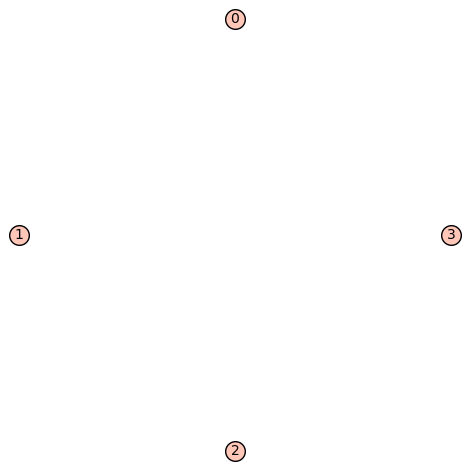

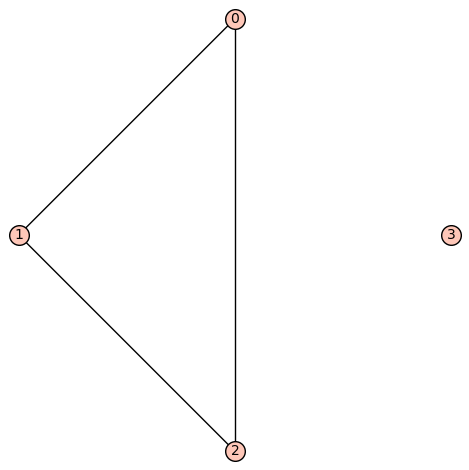

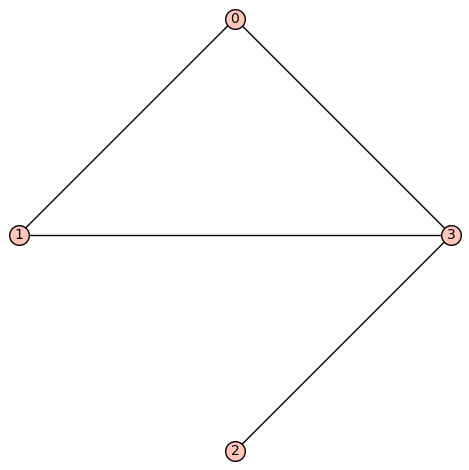

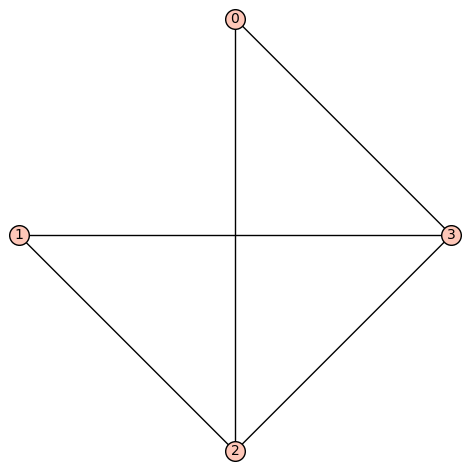

Solution 2


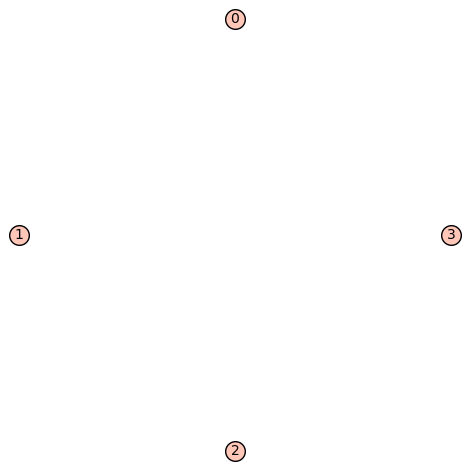

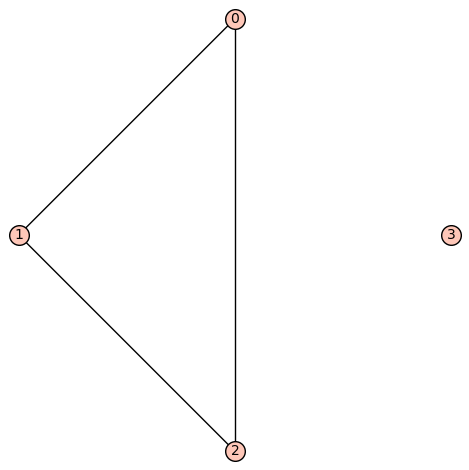

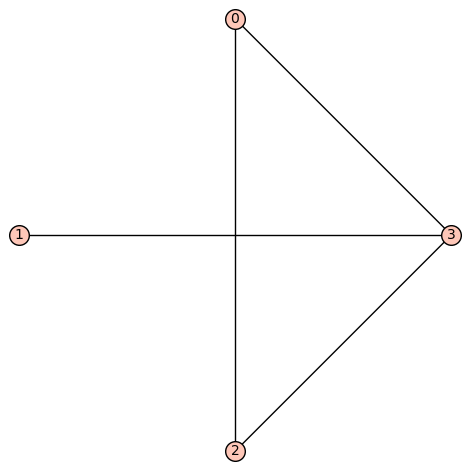

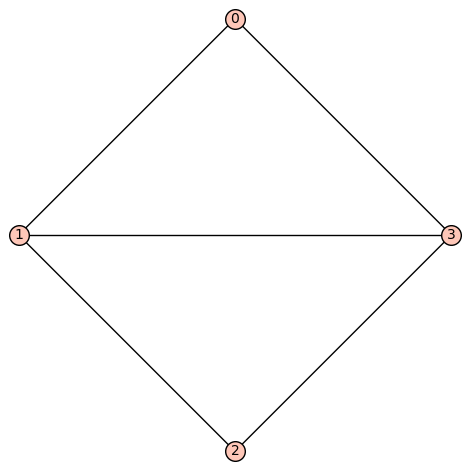

Solution 3


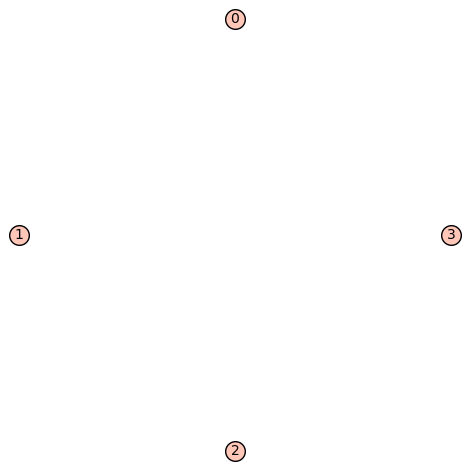

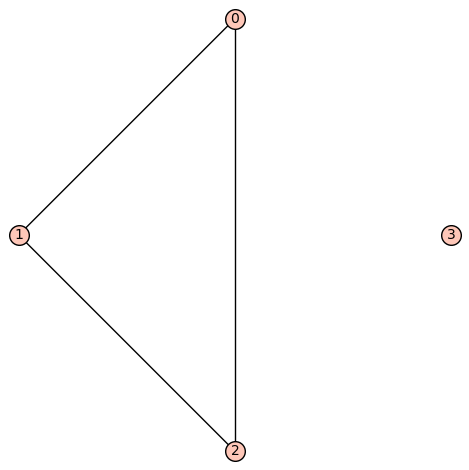

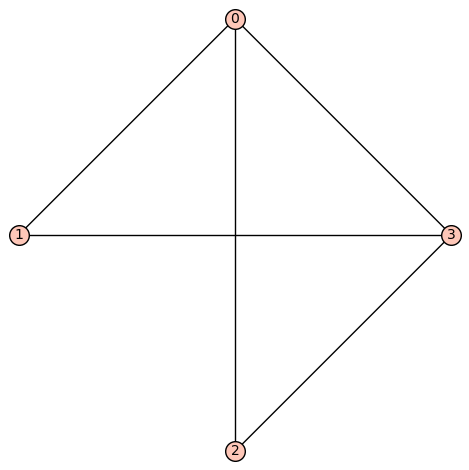

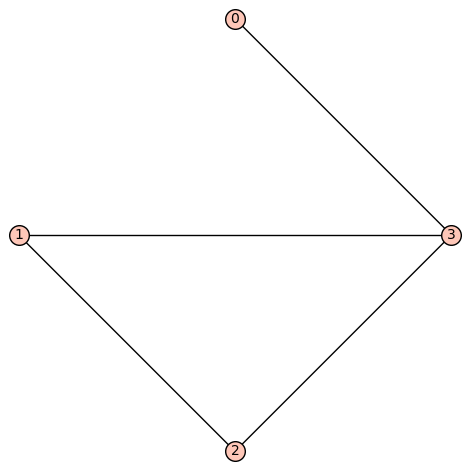

Solution 4


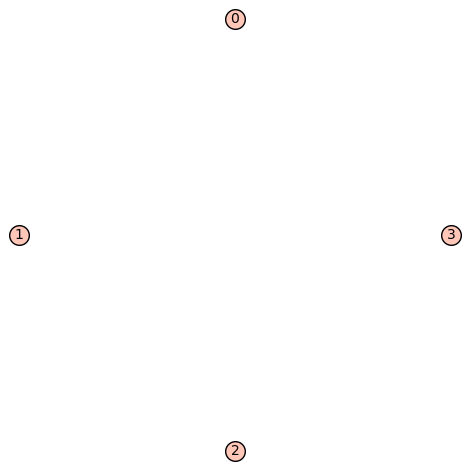

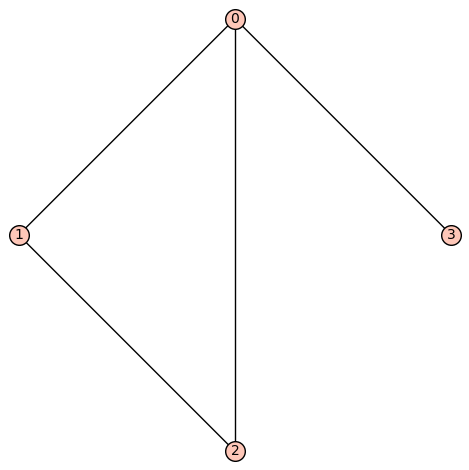

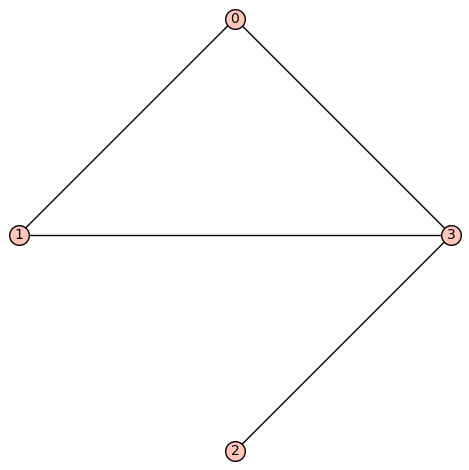

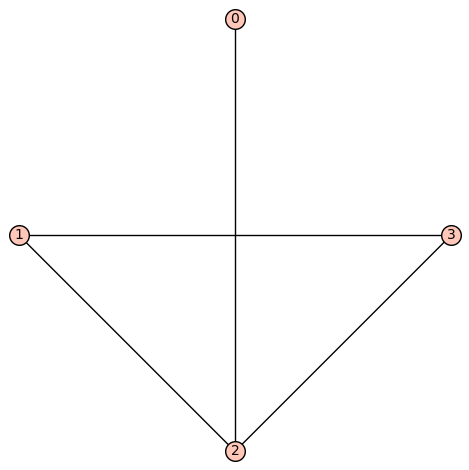

Solution 5


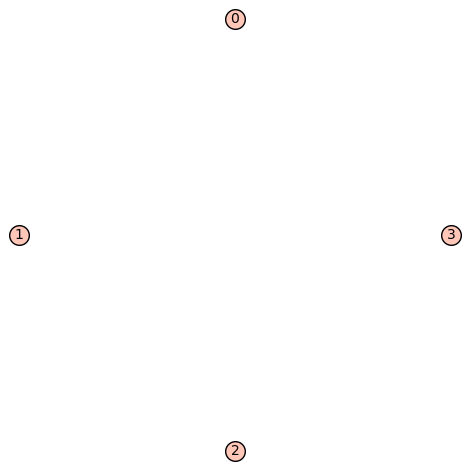

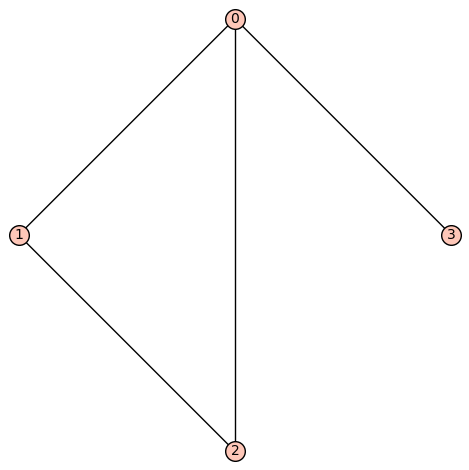

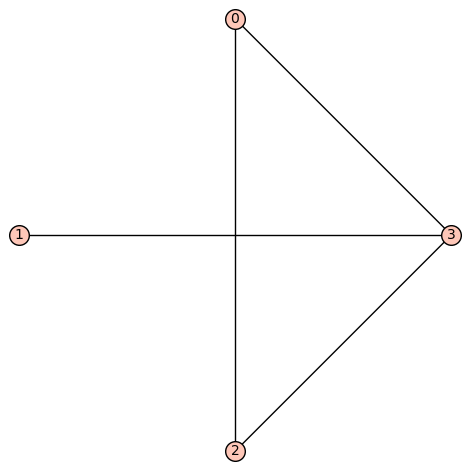

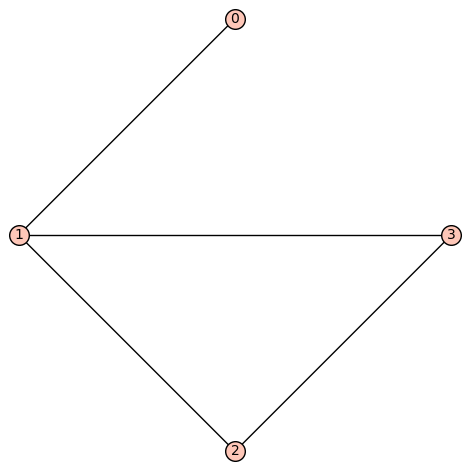

Solution 6


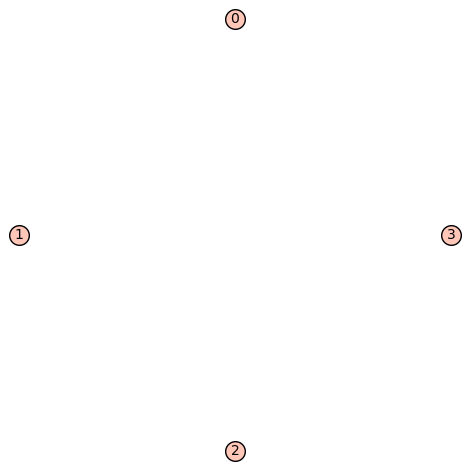

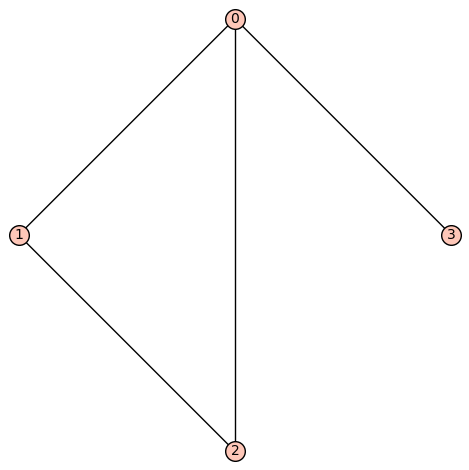

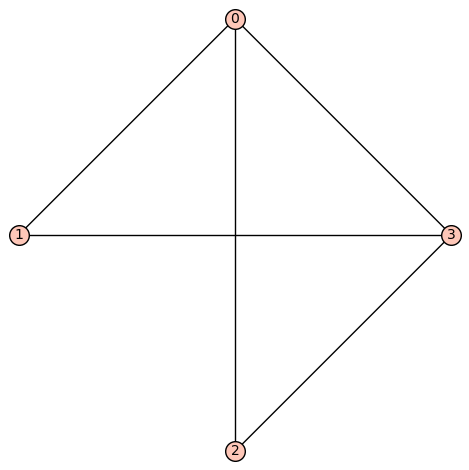

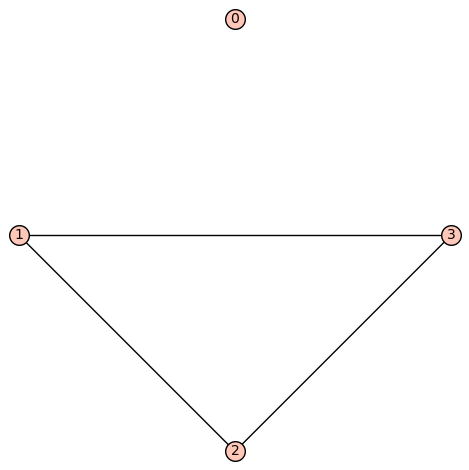

Solution 7


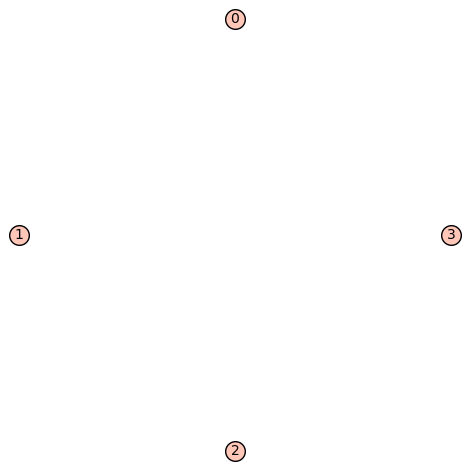

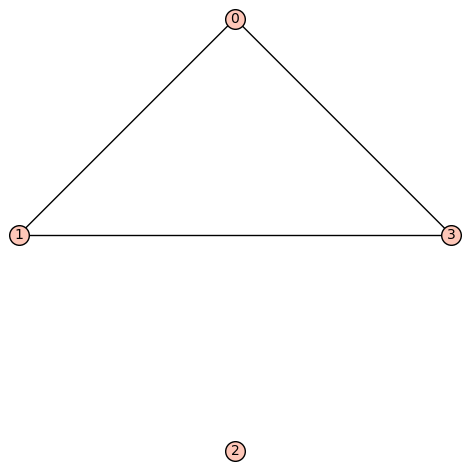

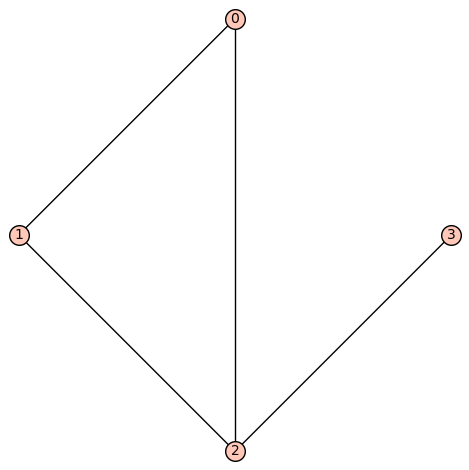

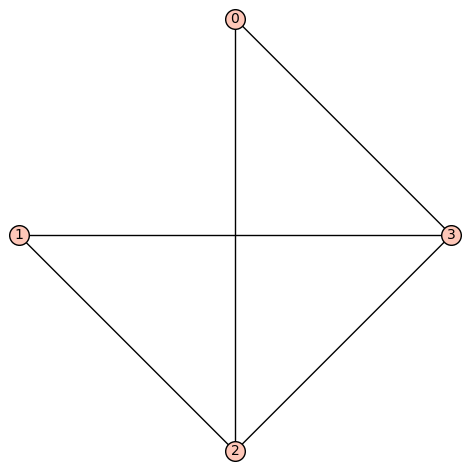

Solution 8


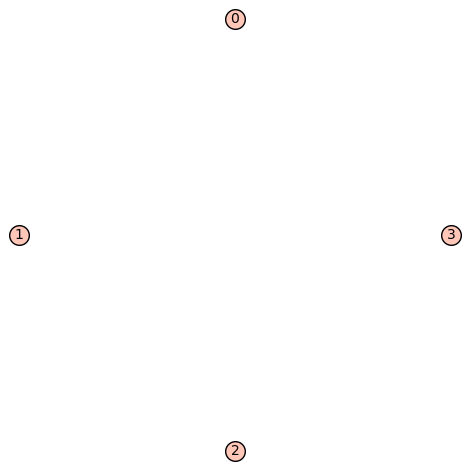

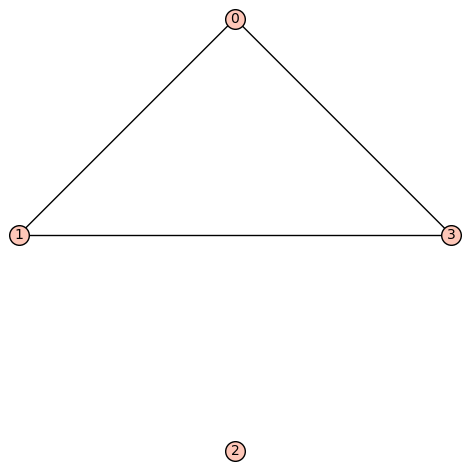

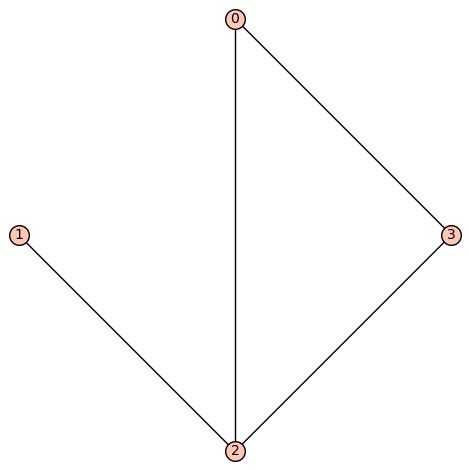

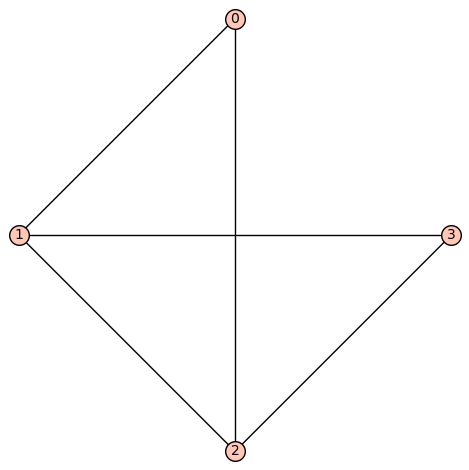

Solution 9


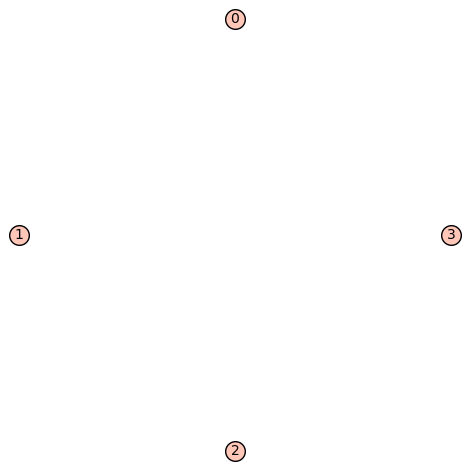

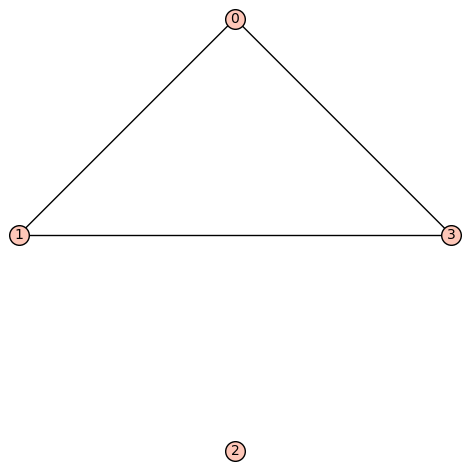

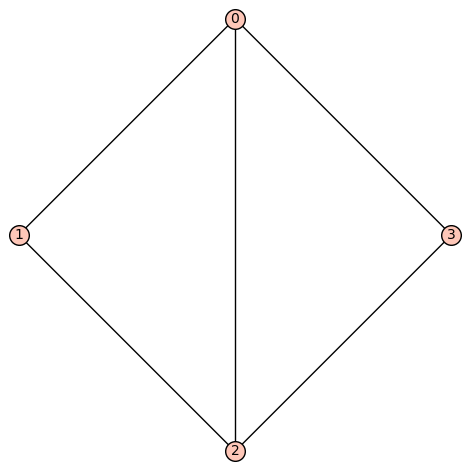

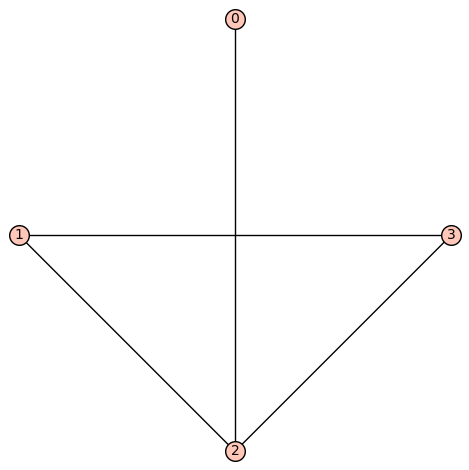

Solution 10


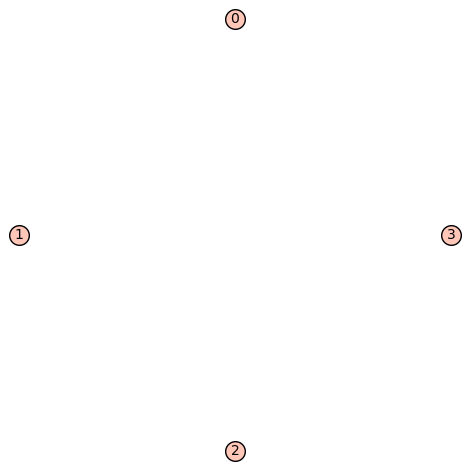

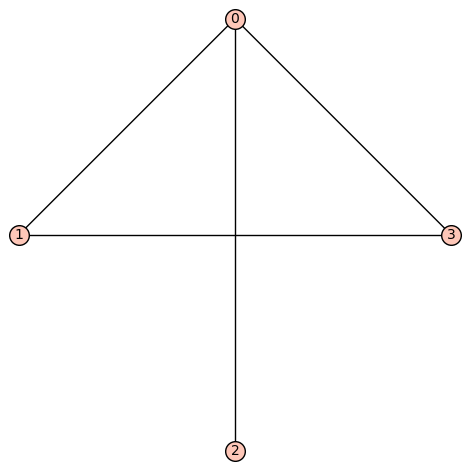

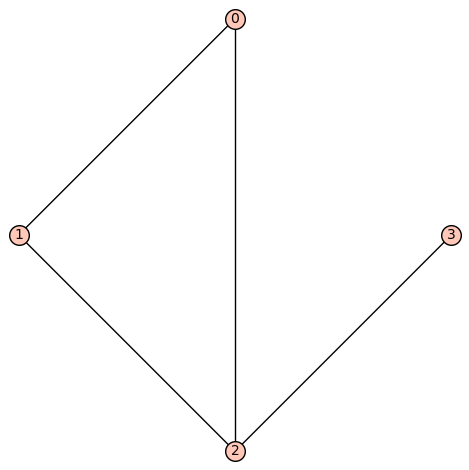

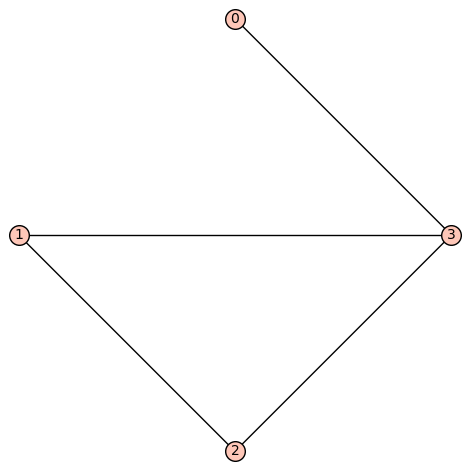

Solution 11


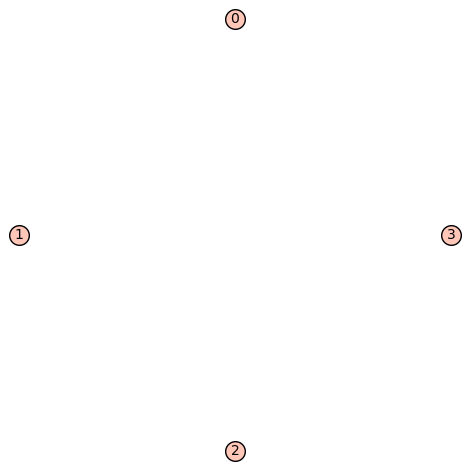

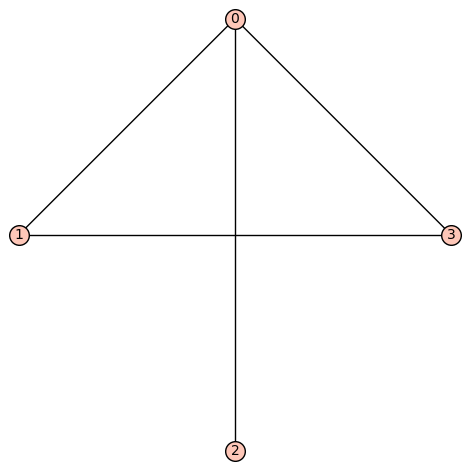

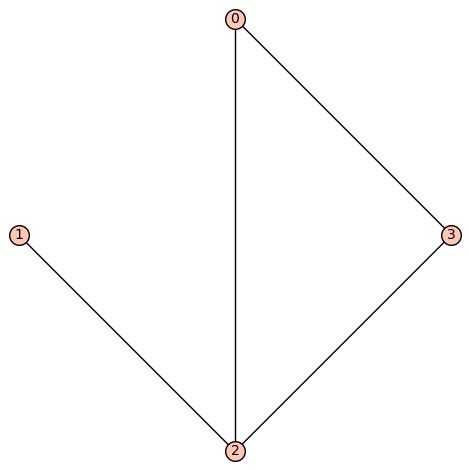

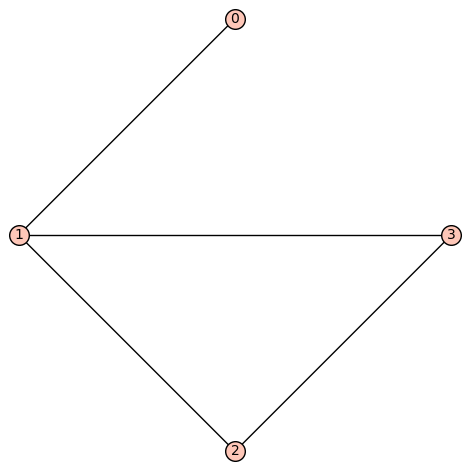

Solution 12


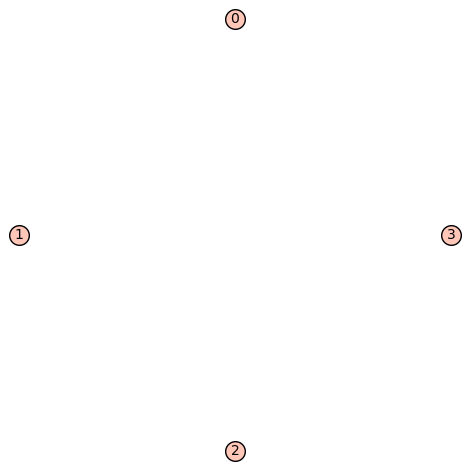

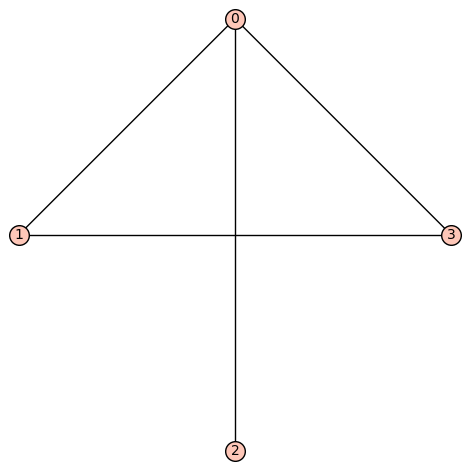

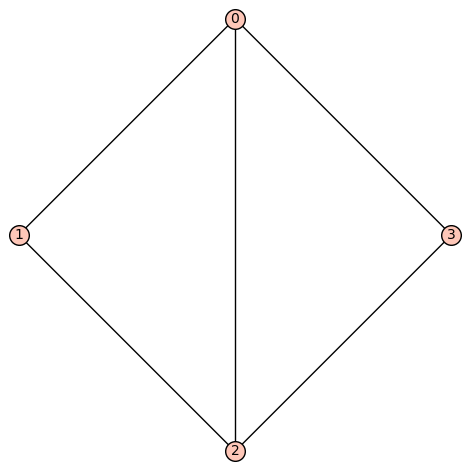

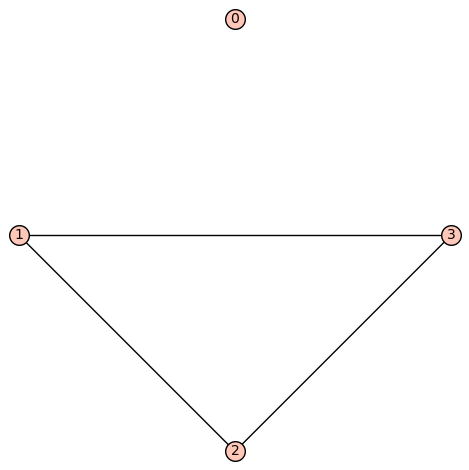

Solution 13


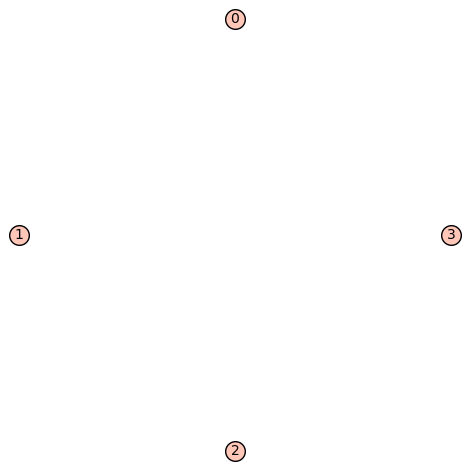

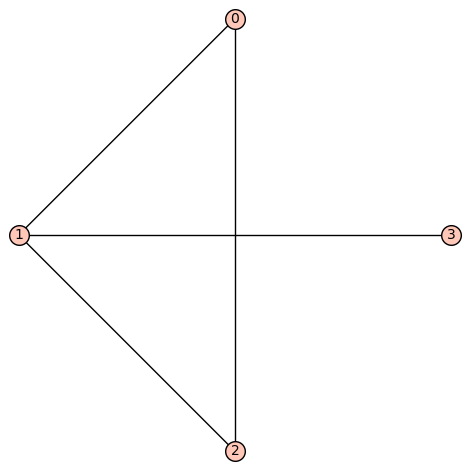

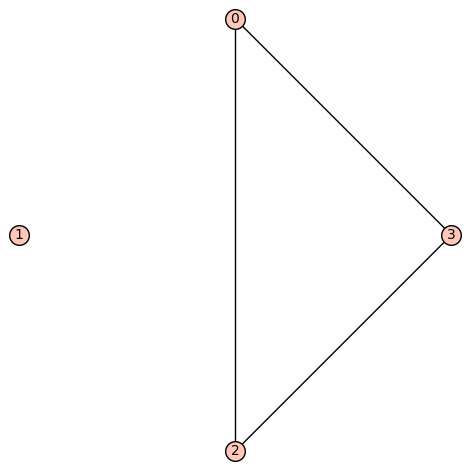

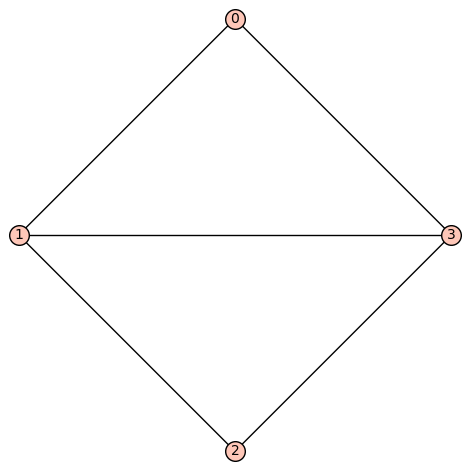

Solution 14


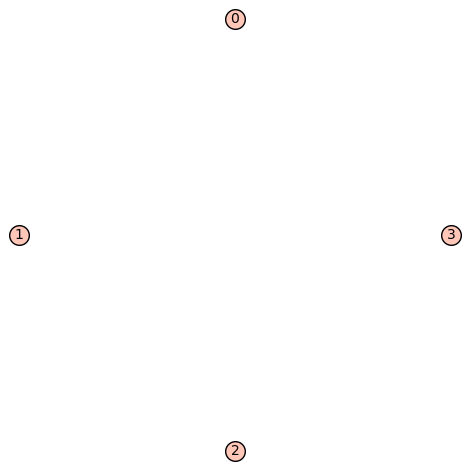

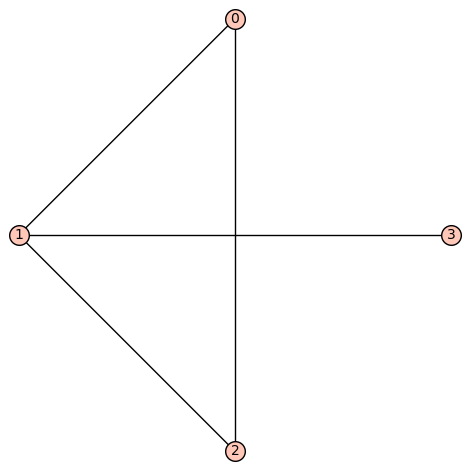

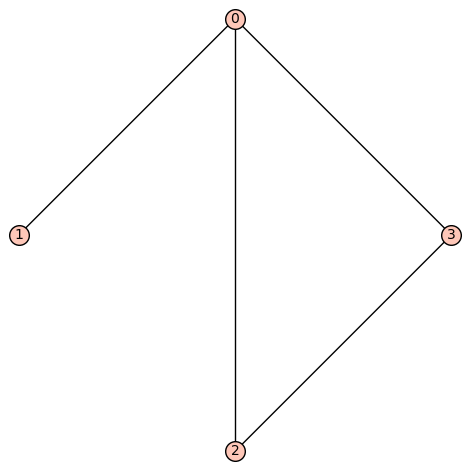

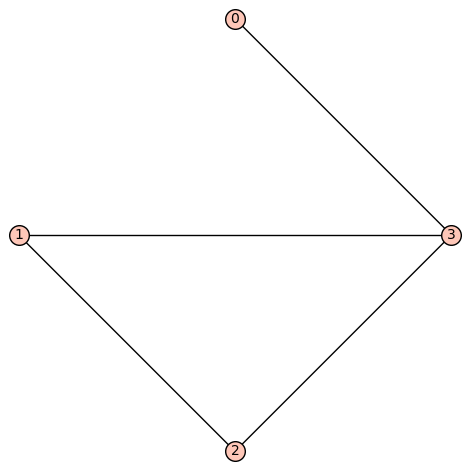

Solution 15


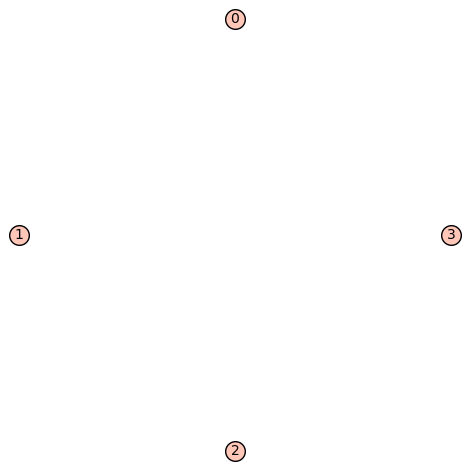

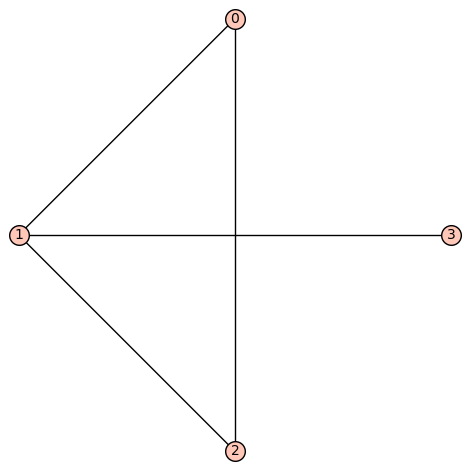

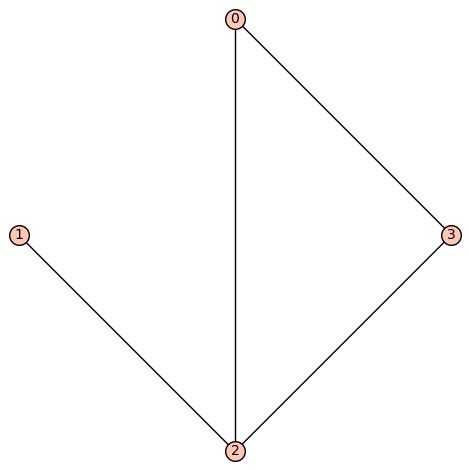

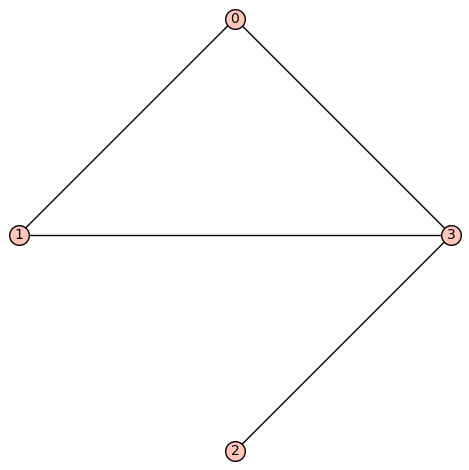

Solution 16


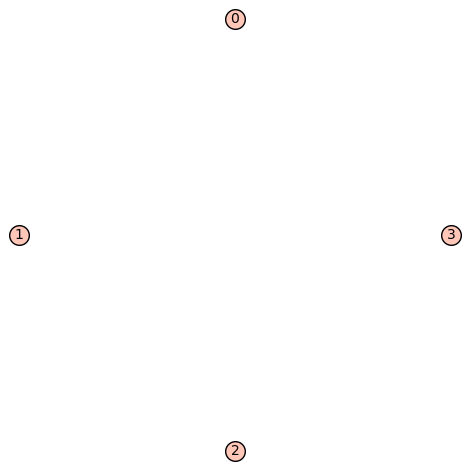

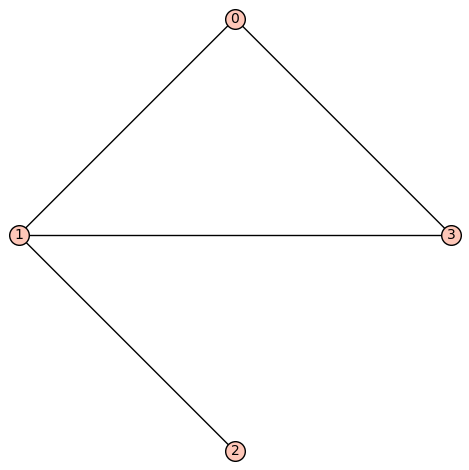

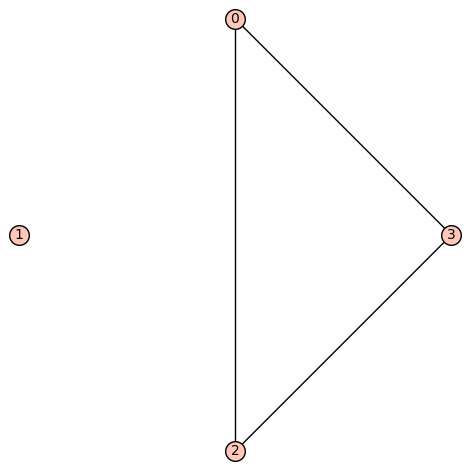

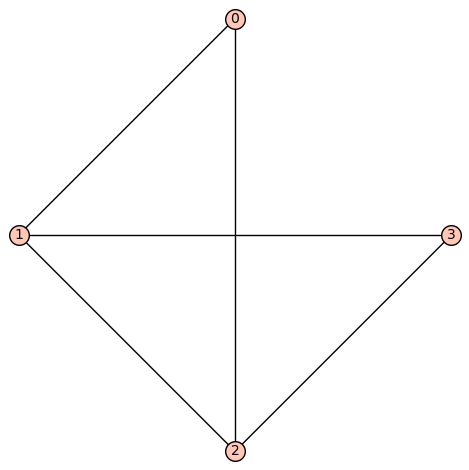

Solution 17


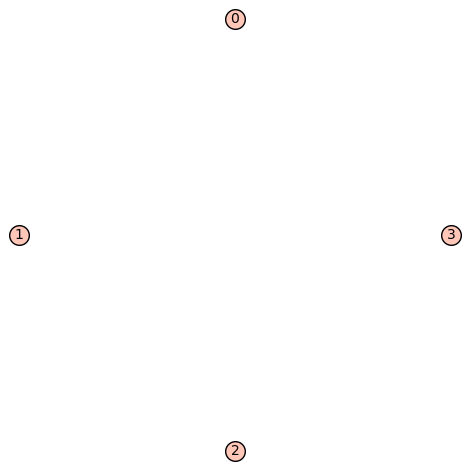

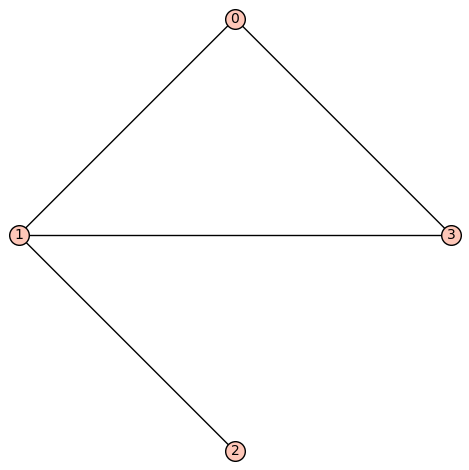

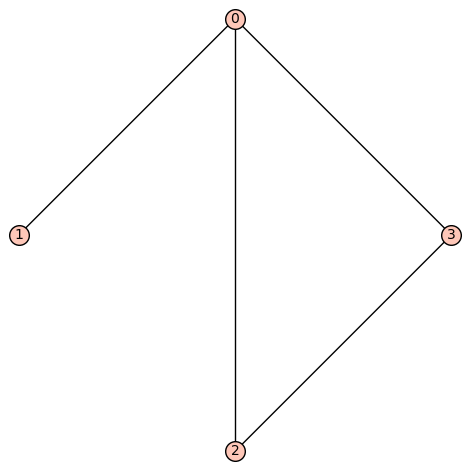

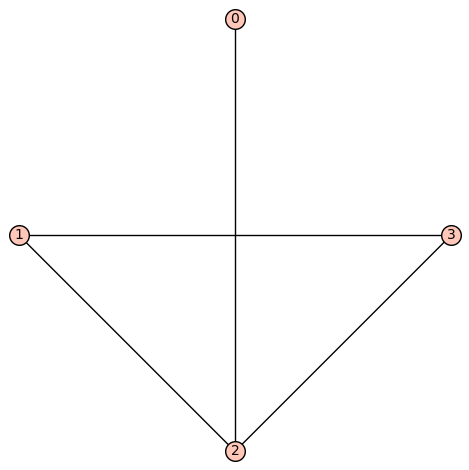

Solution 18


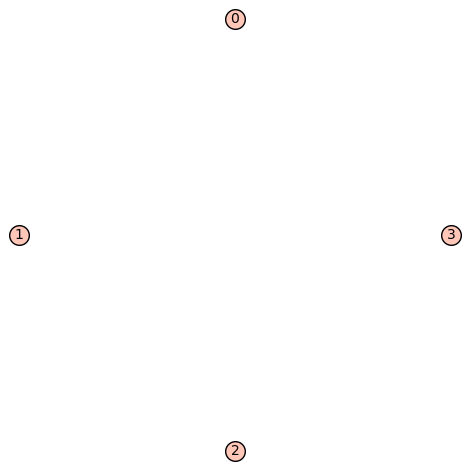

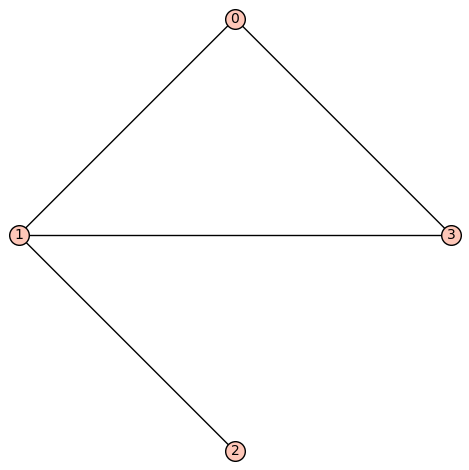

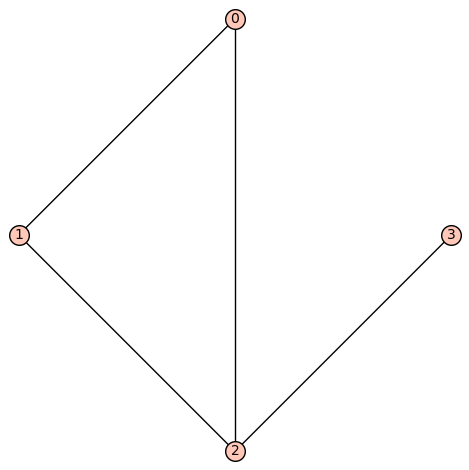

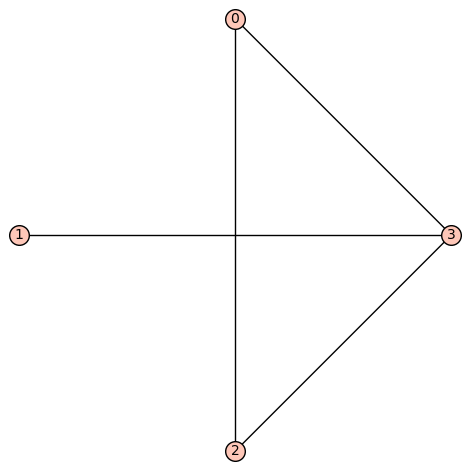

Solution 19


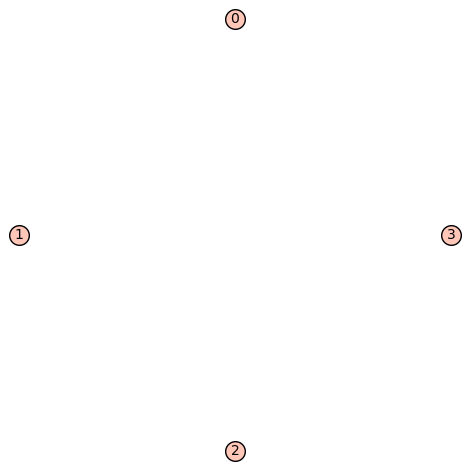

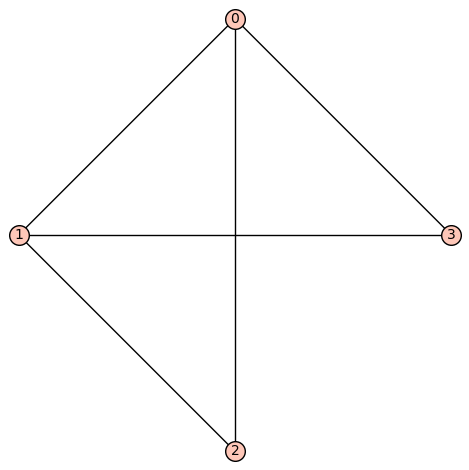

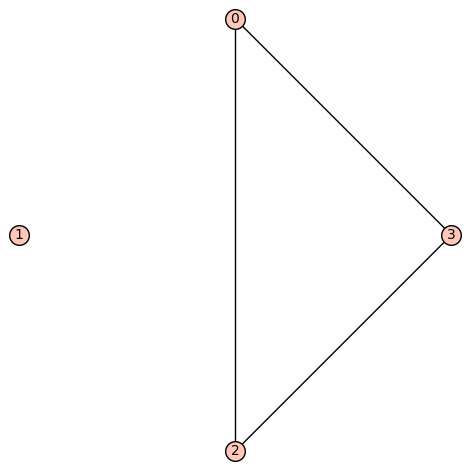

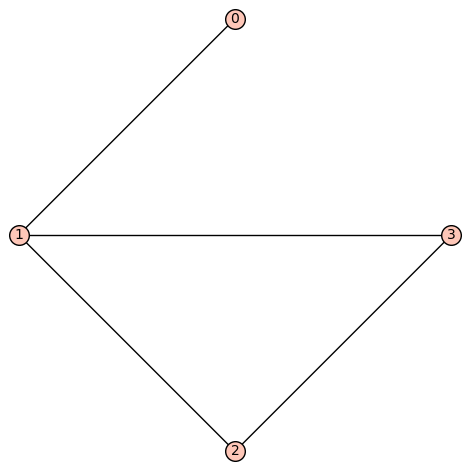

Solution 20


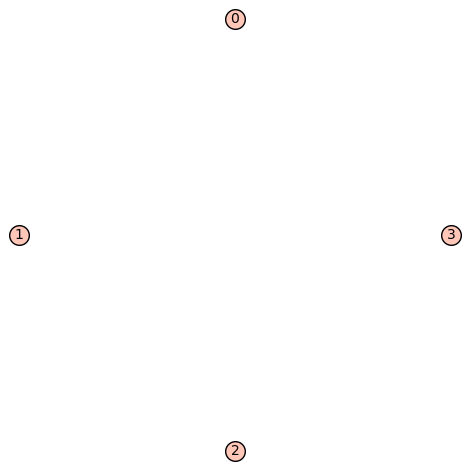

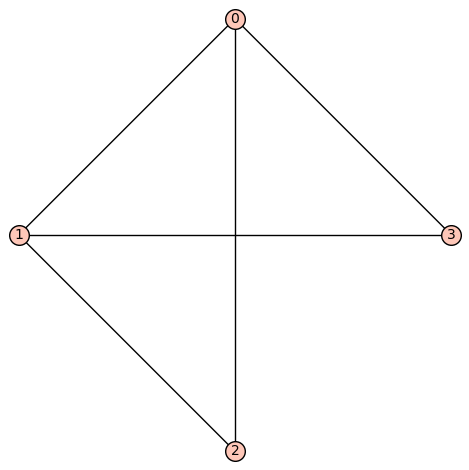

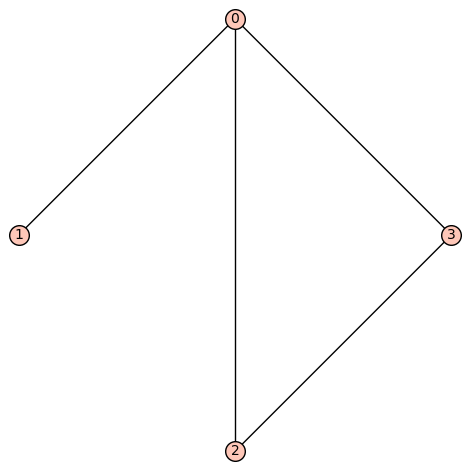

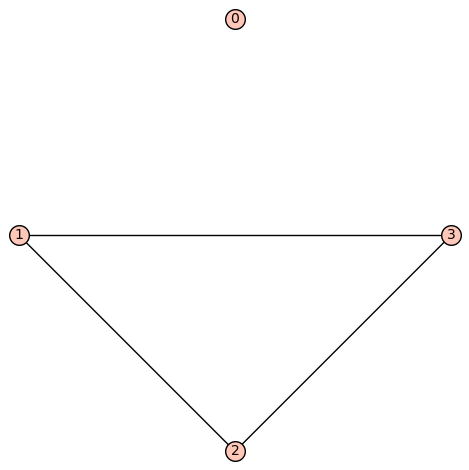

In [26]:
#### "For n=4, the following indices were chosen in the independent set problem"
if n==4:
    indices_chosen = {1: [0, 11, 53, 62],
                      2: [0, 11, 54, 61],
                      3: [0, 11, 55, 60],
                      4: [0, 15, 53, 58],
                      5: [0, 15, 54, 57],
                      6: [0, 15, 55, 56],
                      7: [0, 21, 43, 62],
                      8: [0, 21, 46, 59],
                      9: [0, 21, 47, 58],
                      10:[0, 23, 43, 60],
                      11:[0, 23, 46, 57],
                      12:[0, 23, 47, 56],
                      13:[0, 27, 38, 61],
                      14:[0, 27, 39, 60],
                      15:[0, 27, 46, 53],
                      16:[0, 29, 38, 59],
                      17:[0, 29, 39, 58],
                      18:[0, 29, 43, 54],
                      19:[0, 31, 38, 57],
                      20:[0, 31, 39, 56]}
    for index, values in indices_chosen.items():
        print(f"Solution {index}")
        for value in values:
            P = all_graphs[value].plot(pos=fixed_pos_4)
            P.show()

In [3]:
"Plotting helper"
G1 = graphs.CycleGraph(5)
fixed_pos = G1.layout()

In [ ]:
"For n=5, the following indices were chosen in the independent set problem"
if n==5:
    indices_chosen = [515, 519, 523, 527, 547, 551, 555, 559, 
                      579, 583, 587, 591, 611, 615, 619, 623, 
                      643, 647, 651, 655, 675, 679, 683, 687, 
                      707, 711, 715, 719, 739, 743, 747, 751, 
                      771, 775, 779, 783, 803, 807, 811, 815, 
                      835, 839, 843, 847, 867, 871, 875, 879, 
                      899, 903, 907, 911, 931, 935, 939, 943, 
                      963, 967, 971, 975, 995, 999, 1003, 1007]
    for index in indices_chosen:
        all_graphs[index].show()

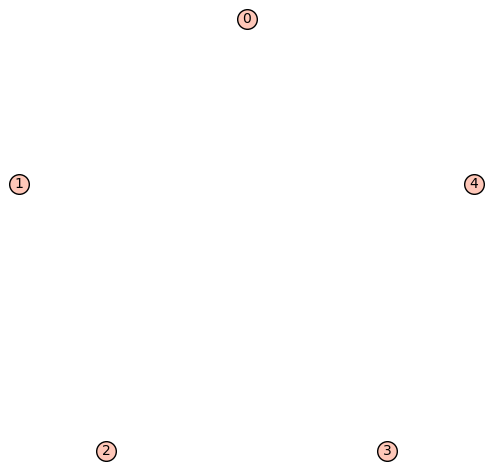

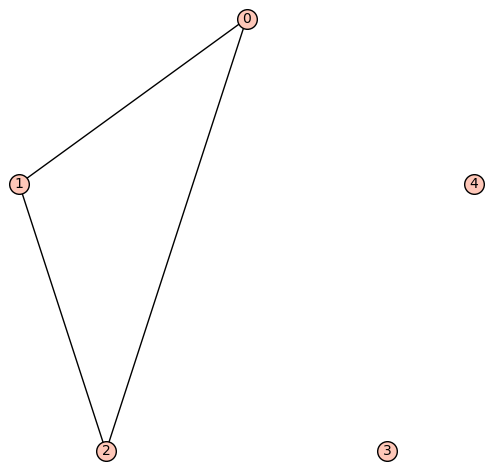

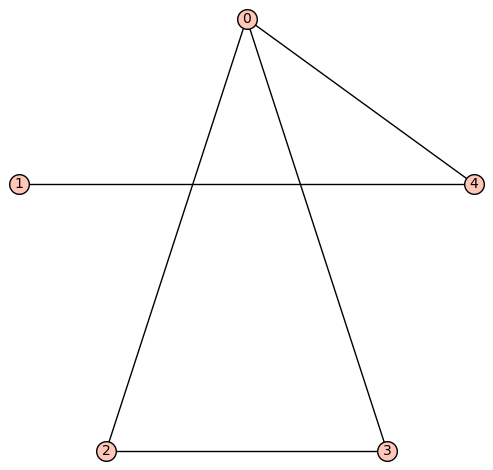

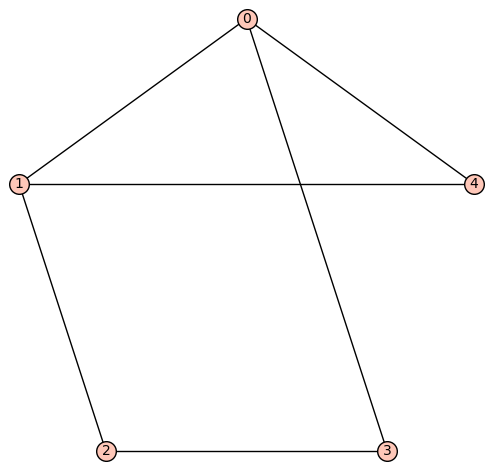

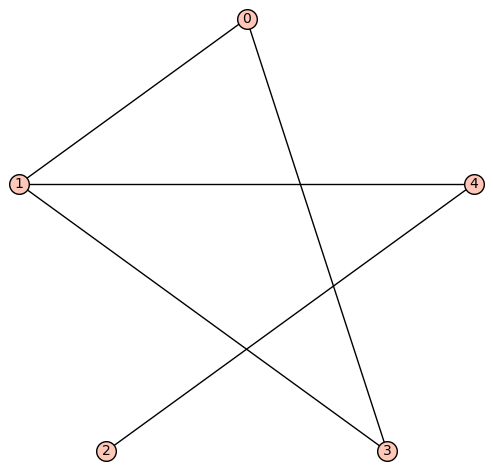

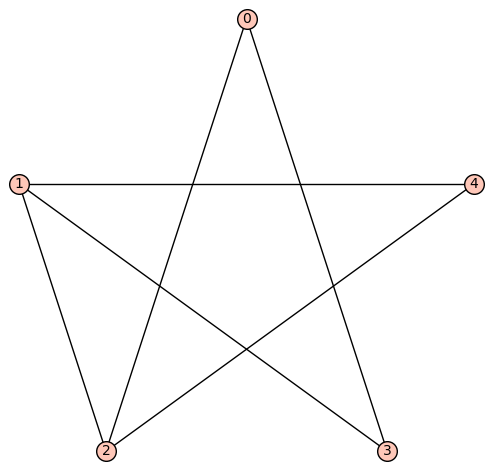

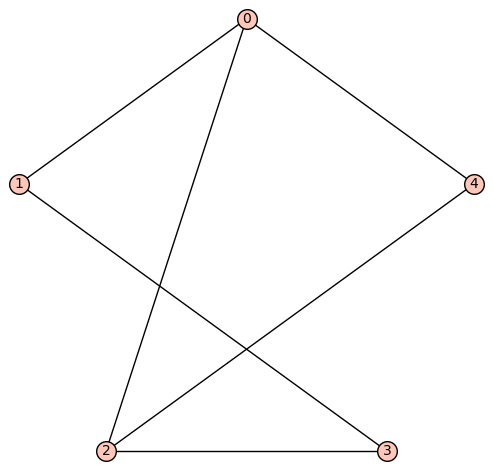

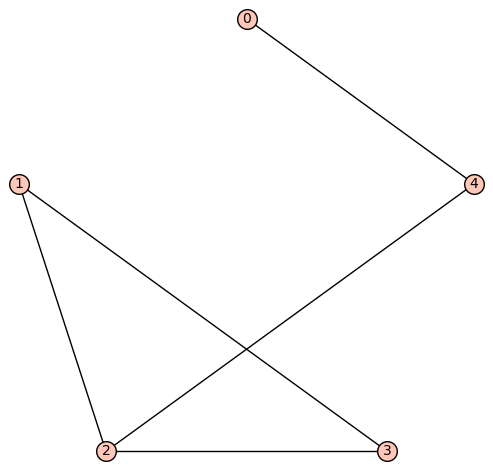

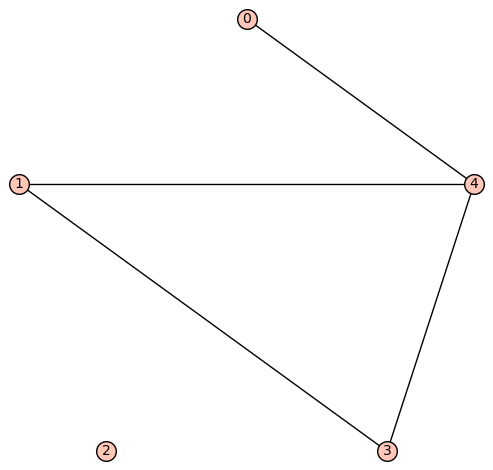

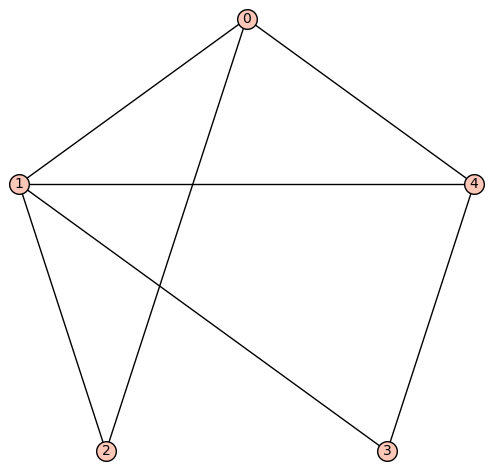

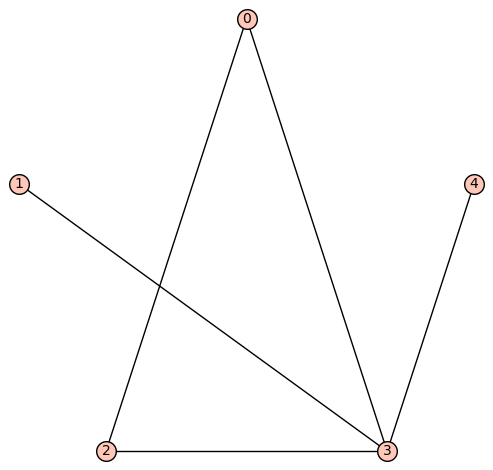

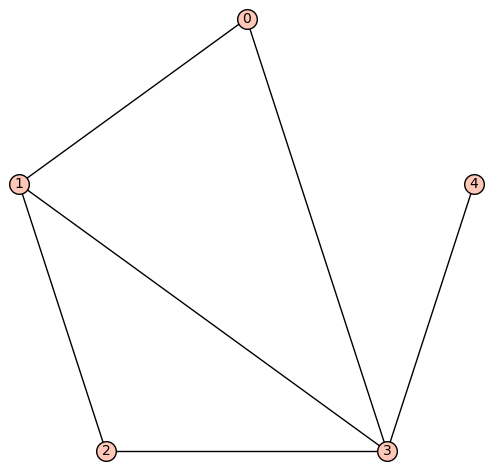

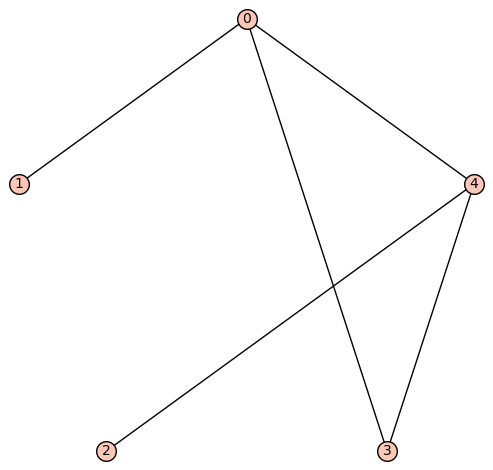

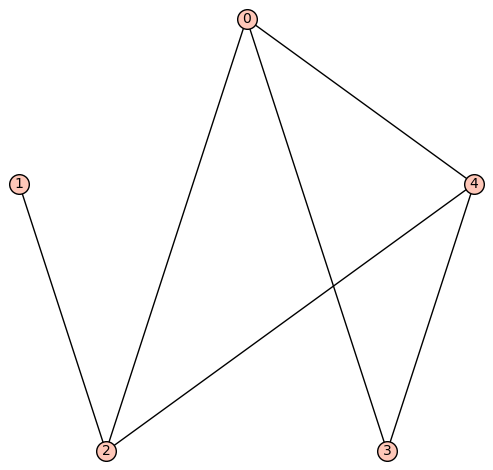

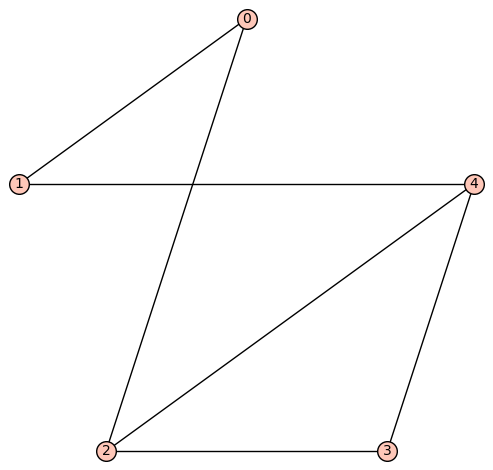

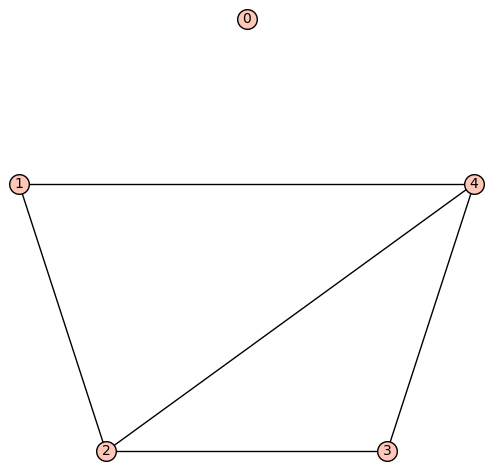

Solution 2
0000000000
0000101111
0001011001
0001110110
0110010101
0110111010
0111001100
0111100011
1010011010
1010110101
1011000011
1011101100
1100001111
1100100000
1101010110
1101111001



In [8]:
"For n=5, the following 10 lists are index solutions to the clique problem (M_K_3(n))"
dict_of_index_lists = {1: [ 81, 108, 202, 247, 259, 318, 408, 421, 525, 560, 662, 683, 863, 866, 964, 1017],
                       2: [ 21,  34, 155, 172, 327, 368, 457, 510, 604, 619, 722, 741, 782, 825, 896,  951],
                       3: [ 23,  34, 153, 172, 325, 368, 459, 510, 606, 619, 720, 741, 780, 825, 898,  951],
                       4: [ 34,  85, 172, 219, 263, 368, 393, 510, 540, 619, 658, 741, 825, 846, 951,  960],
                       5: [ 94, 115, 135, 170, 320, 365, 409, 436, 529, 572, 712, 741, 783, 802, 982, 1019],
                       6: [  3, 122, 157, 228, 297, 336, 439, 462, 526, 631, 656, 745, 804, 861, 954,  963],
                       7: [ 14,  93, 169, 250, 291, 368, 388, 471, 528, 579, 695, 740, 829, 878, 922,  969],
                       8: [  4,  83, 186, 237, 266, 349, 436, 483, 545, 630, 671, 712, 815, 888, 913,  966],
                       9: [ 73,  94, 135, 144, 288, 311, 494, 505, 555, 572, 741, 754, 834, 853, 908,  923],
                       10:[ 26,  67, 157, 196, 297, 368, 430, 503, 549, 636, 674, 763, 790, 847, 913,  968]}

# Fix the empty graph in solution,
# Index 19 is the triangle on vertices 012
dict_of_index_lists2 = {1 : [0, 19, 235, 248, 301, 318, 454, 469, 615, 628, 652, 671, 842, 857, 929, 946] ,
                        2 : [0, 19, 206, 221, 357, 374, 427, 440, 616, 635, 678, 693, 781, 798, 963, 976] ,
                        3 : [0, 19, 235, 248, 301, 318, 454, 469, 612, 631, 655, 668, 841, 858, 930, 945] ,
                        4 : [0, 19, 233, 250, 302, 317, 455, 468, 613, 630, 652, 671, 843, 856, 930, 945] ,
                        5 : [0, 19, 205, 222, 359, 372, 426, 441, 618, 633, 679, 692, 781, 798, 960, 979] ,
                        6 : [0, 19, 233, 250, 302, 317, 455, 468, 612, 631, 653, 670, 842, 857, 931, 944] ,
                        7 : [0, 19, 205, 222, 359, 372, 426, 441, 556, 575, 737, 754, 843, 856, 902, 917] ,
                        8 : [0, 19, 205, 222, 359, 372, 426, 441, 557, 574, 736, 755, 842, 857, 903, 916] ,
                        9 : [0, 19, 235, 248, 301, 318, 454, 469, 588, 607, 679, 692, 865, 882, 906, 921] ,
                        10 : [0, 19, 206, 221, 357, 374, 427, 440, 559, 572, 737, 754, 842, 857, 900, 919]}

if n==5:
    for i in range(2,3):
        edge_repr_list = list()
        for index in dict_of_index_lists2[i]:
            P = all_graphs[index]
            edge_repr_list.append(bin_edge_repr(P))
            P = P.plot(pos=fixed_pos)
            P.show()
        edge_repr_list.sort()
        print(f"Solution {i}")
        for greph in edge_repr_list:
            print(greph)
        print()
    